In [2]:
from transformers import DetrFeatureExtractor, DetrForObjectDetection
from PIL import Image
import matplotlib.pyplot as plt
import requests
import numpy as np

In [14]:
url = 'https://upload.wikimedia.org/wikipedia/en/e/e1/AAA_-_10th_Anniversary_Best_%28CD_Cover%29.jpg'
image = Image.open(requests.get(url, stream=True).raw)

In [15]:
feature_extractor = DetrFeatureExtractor.from_pretrained('facebook/detr-resnet-50')
model = DetrForObjectDetection.from_pretrained('facebook/detr-resnet-50')

In [16]:
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)

In [17]:
# model predicts bounding boxes and corresponding COCO classes
logits  = outputs.logits
bboxes = outputs.pred_boxes

In [18]:
COLORS = [
    [0.000, 0.447, 0.741], 
    [0.850, 0.325, 0.098], 
    [0.929, 0.694, 0.125],
    [0.494, 0.184, 0.556],
    [0.466, 0.674, 0.188],
    [0.301, 0.745, 0.933]  
]

CLASSES = ['N/A', 'Person', 'Bicycle', 'Car', 'Motorcycle', 'Airplane', 'Bus', 'Train', 'Truck', 'Boat', 'Traffic-Light', 'Fire-Hydrant', 'N/A', 'Stop-Sign', 'Parking Meter', 'Bench', 'Bird', 'Cat', 'Dog', 'Horse', 'Sheep', 'Cow', 'Elephant', 'Bear', 'Zebra', 'Giraffe', 'N/A', 'Backpack', 'Umbrella', 'N/A', 'N/A', 'Handbag', 'Tie', 'Suitcase', 'Frisbee', 'Skis', 'Snowboard', 'Sports-Ball', 'Kite', 'Baseball Bat', 'Baseball Glove', 'Skateboard', 'Surfboard', 'Tennis Racket', 'Bottle', 'N/A', 'Wine Glass', 'Cup', 'Fork', 'Knife', 'Spoon', 'Bowl', 'Banana', 'Apple', 'Sandwich', 'Orange', 'Broccoli', 'Carrot', 'Hot-Dog', 'Pizza', 'Donut', 'Cake', 'Chair', 'Couch', 'Potted Plant', 'Bed', 'N/A', 'Dining Table', 'N/A','N/A', 'Toilet', 'N/A', 'TV', 'Laptop', 'Mouse', 'Remote', 'Keyboard', 'Cell-Phone', 'Microwave', 'Oven', 'Toaster', 'Sink', 'Refrigerator', 'N/A', 'Book', 'Clock', 'Vase', 'Scissors', 'Teddy-Bear', 'Hair-Dryer', 'Toothbrush', 'Person','NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE']

prob = logits.tolist()[0]
prob = np.array(prob)
print(prob)
boxes = bboxes.tolist()[0]
boxes = np.array(boxes)
print(boxes)


[[-13.75484753   3.25582314  -1.75212789 ... -10.86507893  -8.02848434
    5.99902058]
 [-10.56910324   0.71709687  -4.48816061 ...  -7.33824396   0.62265432
    5.86588669]
 [-16.18244553   0.96949911  -3.89213777 ...  -7.15609694  -7.54898977
    7.12867212]
 ...
 [-14.57482147  -1.8071754   -9.15378952 ...  -6.56861401   0.42900407
    6.67851305]
 [-15.08550739   7.90442133  -4.32977104 ... -10.4135294   -7.97672367
    6.85615396]
 [-14.15289974  -2.05111408  -8.64563084 ...  -3.98160338   0.70606744
    6.55824471]]
[[0.00552507 0.75555384 0.01106598 0.48561281]
 [0.49209157 0.55318105 0.02224333 0.13923989]
 [0.1066132  0.69566834 0.10883714 0.32757092]
 [0.74053764 0.43758017 0.03948286 0.02617491]
 [0.34678224 0.55323613 0.1397711  0.36411631]
 [0.39681977 0.66688114 0.31459898 0.6683625 ]
 [0.40135959 0.62742388 0.0377533  0.19242381]
 [0.23705547 0.64503849 0.06289484 0.29927355]
 [0.22220245 0.53690422 0.04043064 0.12000766]
 [0.00934898 0.68482929 0.01885882 0.62741965]
 [

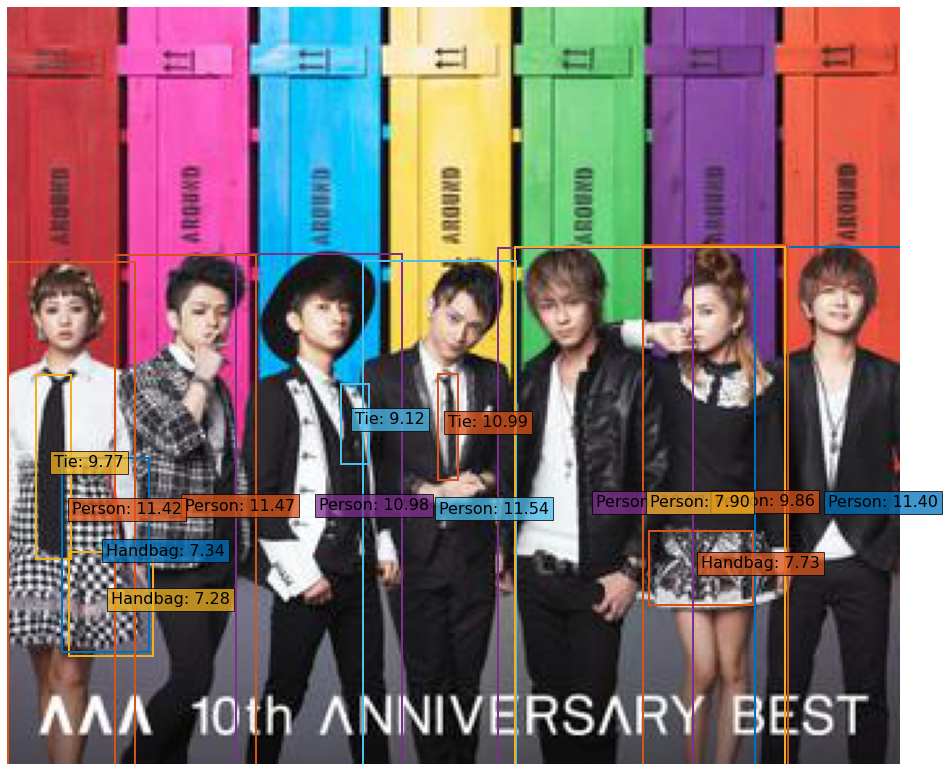

In [19]:
plt.figure(figsize=(16,16))
w, h = image.size 

plt.imshow(image)
ax = plt.gca()

for probs, (x0, y0, x1, y1), color in zip(prob, boxes, COLORS * 100):
    cl = probs.argmax()
    if cl != 91:
        width = x1 * w
        height = y1 * h
        left = x0 * w - width/2
        top = y0 * h - height/2
        ax.add_patch(plt.Rectangle((left, top), width, height, fill=False, color=color, linewidth=2))
        text = f'{CLASSES[cl]}: {probs[cl]:0.2f}'
        ax.text(x0*w, y0*h, text, fontsize=16,
                bbox=dict(facecolor=color, alpha=0.75))
        
plt.axis('off')
plt.show()